In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Select a dataset to insepct by commenting out:

#df = pd.read_feather('data/raw/2018-citibike-tripdata.feather')
#df = pd.read_feather('data/intermediate/cleaned_data.feather')
#df = pd.read_feather('data/intermediate/balanced_data.feather')
df = pd.read_feather('data/intermediate/feature_data.feather')


In [3]:
# inspect nan values
df.isnull().sum()

tripduration          0
start_station_id      0
start_station_lat     0
start_station_long    0
end_station_id        0
end_station_lat       0
end_station_long      0
bikeid                0
usertype              0
birth_year            0
gender                0
day                   0
day_sin               0
day_cos               0
month_sin             0
month_cos             0
dtype: int64

In [4]:
# inspect the columns
df.dtypes

tripduration            int64
start_station_id        int64
start_station_lat     float64
start_station_long    float64
end_station_id          int64
end_station_lat       float64
end_station_long      float64
bikeid                  int64
usertype                int64
birth_year              int64
gender                  int64
day                     int32
day_sin               float64
day_cos               float64
month_sin             float64
month_cos             float64
dtype: object

In [5]:
# number of rows
len(df.index)

3858944

In [6]:
# inspect  some example rows
df.head()

,tripduration,start_station_id,start_station_lat,start_station_long,end_station_id,end_station_lat,end_station_long,bikeid,usertype,birth_year,gender,day,day_sin,day_cos,month_sin,month_cos
0,1844,3150,40.775369,-73.948034,514,40.760875,-74.002777,33461,1,1969,2,1,0.810425,0.585842,0.866025,0.500000
1,1863,161,40.729170,-73.998102,3233,40.757246,-73.978059,20004,0,1990,1,2,0.407069,-0.913398,0.500000,-0.866025
2,227,3443,40.761330,-73.979820,457,40.766953,-73.981693,32256,1,1974,1,4,0.995538,0.094362,0.258819,0.965926
3,1336,478,40.760301,-73.998842,3002,40.711512,-74.015756,33451,0,1969,0,6,0.851155,-0.524915,0.500000,-0.866025
4,5977,3254,40.692317,-74.014866,3254,40.692317,-74.014866,18503,0,1969,0,4,0.995694,0.092696,0.965926,-0.258819


In [7]:
# inspect mean values
df.describe()

,tripduration,start_station_id,start_station_lat,start_station_long,end_station_id,end_station_lat,end_station_long,bikeid,usertype,birth_year,gender,day,day_sin,day_cos,month_sin,month_cos
count,3.858944e+06,3.858944e+06,3.858944e+06,3.858944e+06,3.858944e+06,3.858944e+06,3.858944e+06,3.858944e+06,3858944.0,3.858944e+06,3.858944e+06,3.858944e+06,3.858944e+06,3.858944e+06,3.858944e+06,3.858944e+06
mean,1.217489e+03,1.645958e+03,4.073850e+01,-7.398276e+01,1.637420e+03,4.073809e+01,-7.398304e+01,2.602352e+04,0.5,1.977535e+03,8.793774e-01,3.162319e+00,7.832417e-01,-2.943745e-01,7.345458e-01,-2.198979e-01
std,2.157152e+03,1.440333e+03,3.159898e-02,1.951307e-02,1.438724e+03,3.140809e-02,1.951715e-02,6.308085e+03,0.5,1.129875e+01,7.032062e-01,2.006633e+00,2.335673e-01,4.953005e-01,2.792302e-01,5.780294e-01
min,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.408364e+01,1.452900e+04,0.0,1.919000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.224647e-16,-1.000000e+00
25%,4.690000e+02,3.830000e+02,4.071606e+01,-7.399667e+01,3.860000e+02,4.071602e+01,-7.399705e+01,1.967200e+04,0.0,1.969000e+03,0.000000e+00,1.000000e+00,6.804545e-01,-7.096476e-01,5.000000e-01,-7.071068e-01
50%,8.720000e+02,5.160000e+02,4.073936e+01,-7.398516e+01,5.140000e+02,4.073932e+01,-7.398565e+01,2.766100e+04,0.5,1.975000e+03,1.000000e+00,3.000000e+00,8.672228e-01,-3.889230e-01,8.660254e-01,-2.588190e-01
75%,1.464000e+03,3.255000e+03,4.076123e+01,-7.397121e+01,3.255000e+03,4.076088e+01,-7.397137e+01,3.145400e+04,1.0,1.988000e+03,1.000000e+00,5.000000e+00,9.646725e-01,6.950256e-02,9.659258e-01,2.588190e-01
max,8.638500e+04,3.721000e+03,4.081439e+01,-7.390774e+01,3.721000e+03,4.081439e+01,-7.390774e+01,3.580600e+04,1.0,2.002000e+03,2.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.659258e-01


In [8]:
# distribution of gender
df.groupby(['gender']).size().reset_index(name='counts')

,gender,counts
0,0,1214933
1,1,1894554
2,2,749457


In [9]:
# distribution of usertype
df.groupby(['usertype']).size().reset_index(name='counts')

,usertype,counts
0,0,1929472
1,1,1929472


In [10]:
# distribution of usertype and gender
df.groupby(['usertype', 'gender']).size().reset_index(name='counts')

,usertype,gender,counts
0,0,0,1177920
1,0,1,472438
2,0,2,279114
3,1,0,37013
4,1,1,1422116
5,1,2,470343


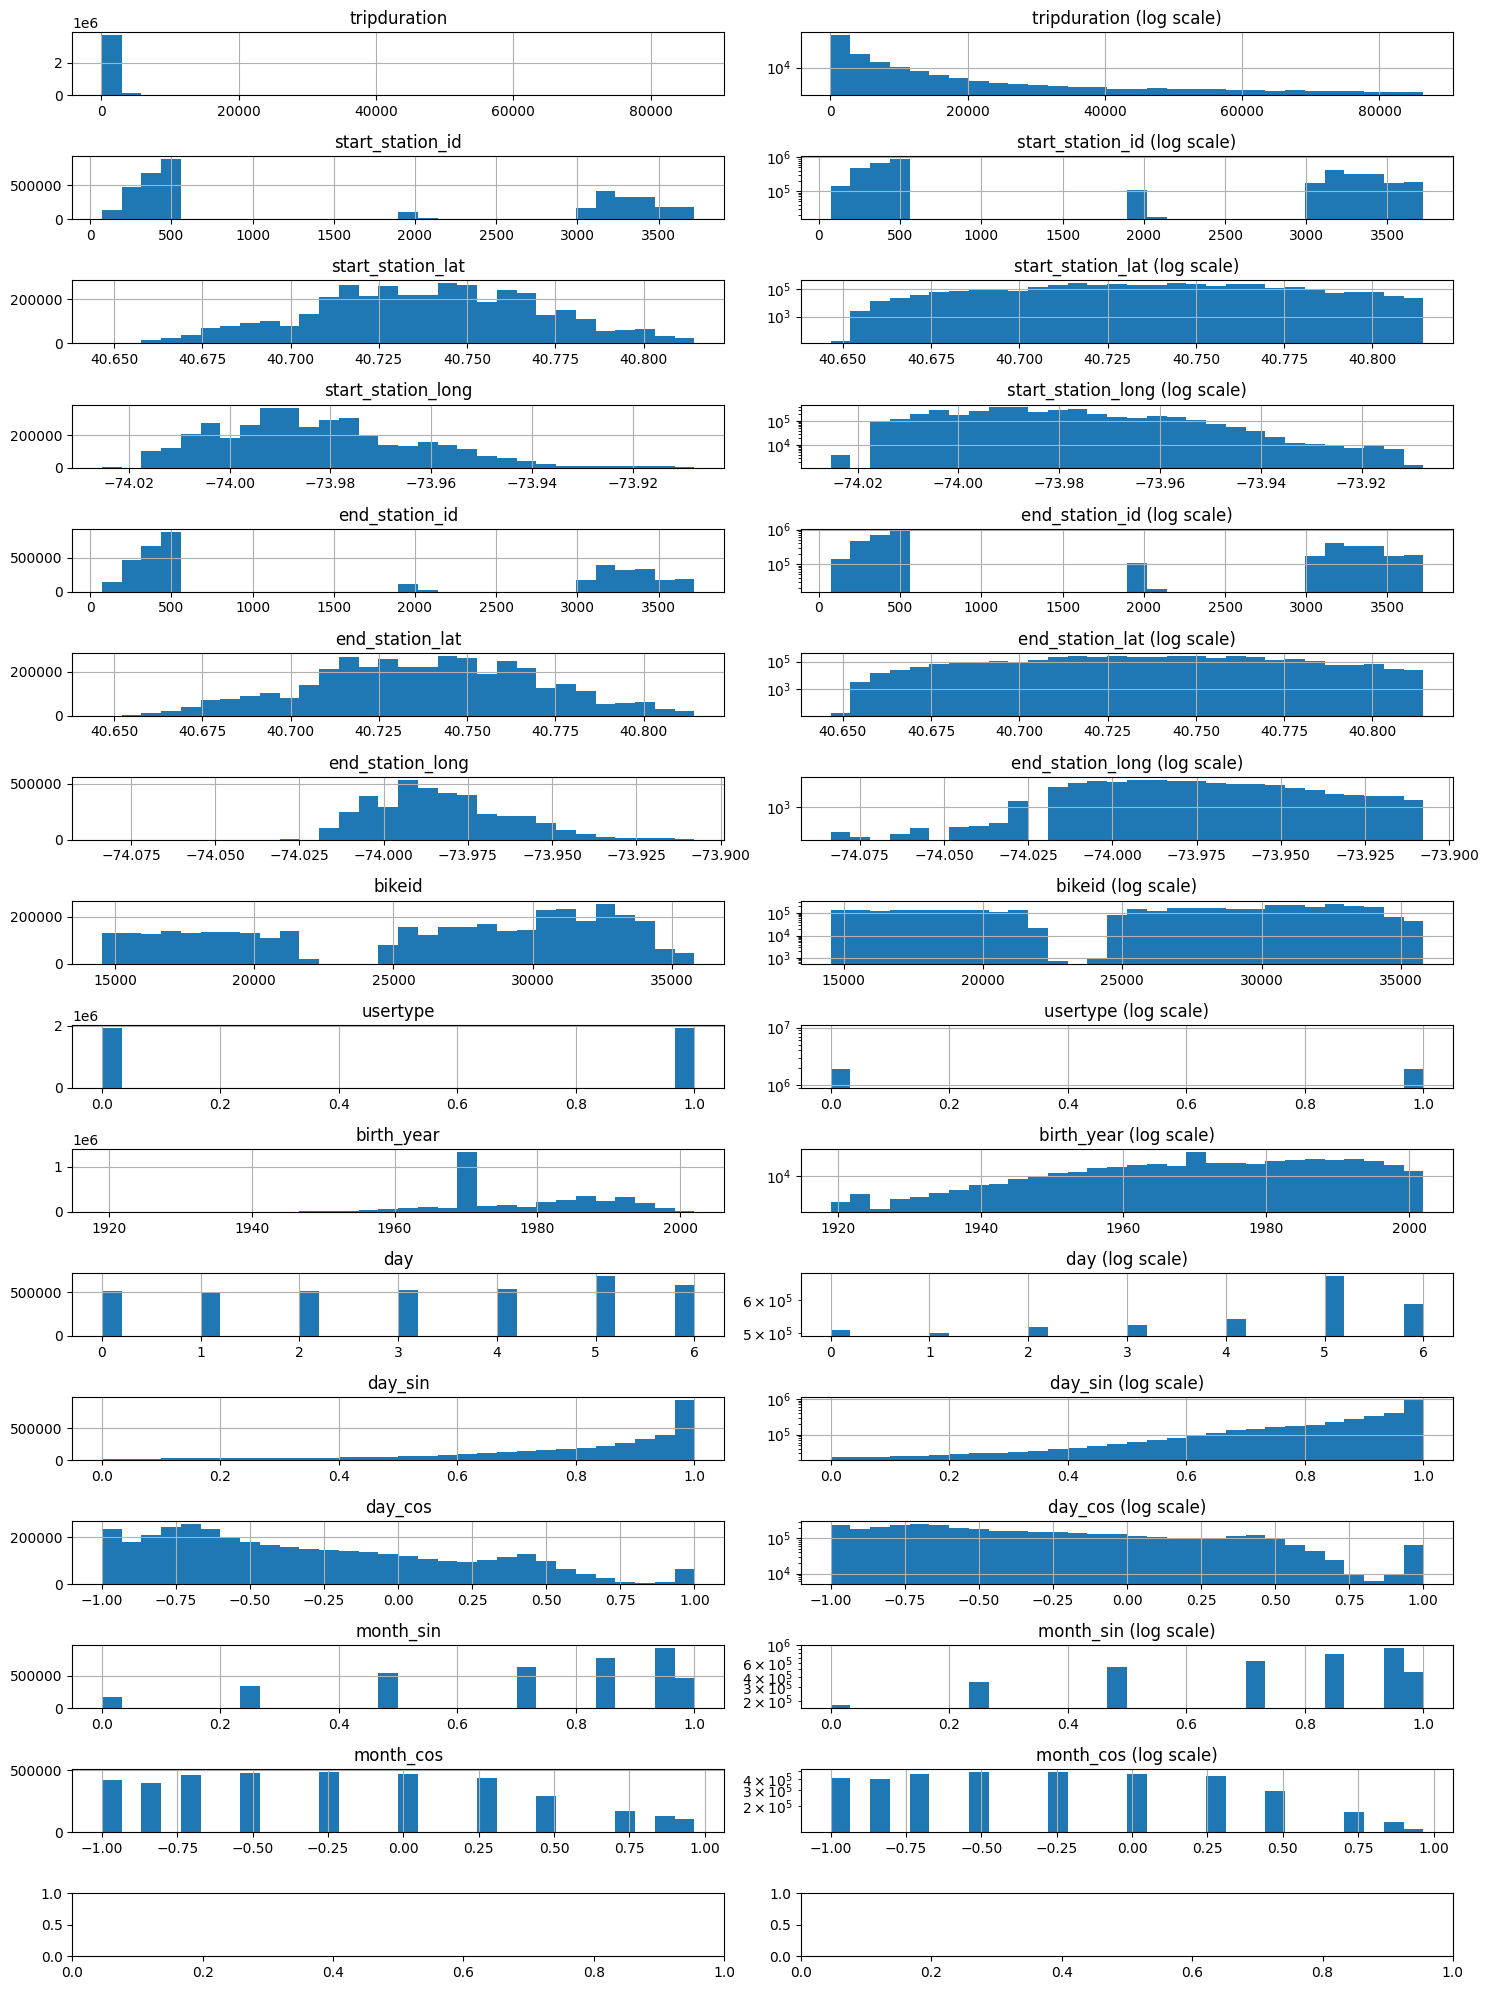

In [15]:

# plot values to identify outliers
fig, axes = plt.subplots(nrows=16, ncols=2, figsize=(15,20))

i = 1
for col in df.columns:
    if (df[col].dtype == np.float64 or df[col].dtype == np.int64 or df[col].dtype == np.int32) and col != 'gender':
        ax = plt.subplot(16, 2, i)
        df[col].hist(bins=30)
        ax.set_title(col)
        i += 1
        ax = plt.subplot(16, 2, i)
        df[col].hist(bins=30)
        ax.set_title(col+" (log scale)")
        ax.set_yscale('log')
        i += 1

fig.tight_layout()
plt.show()